#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/sample_data_with_outliers.csv")
df.head(5)


,Age,Income,Purchase
0,76,75071,1
1,88,62405,0
2,82,61914,1
3,81,66843,1
4,62,30492,0


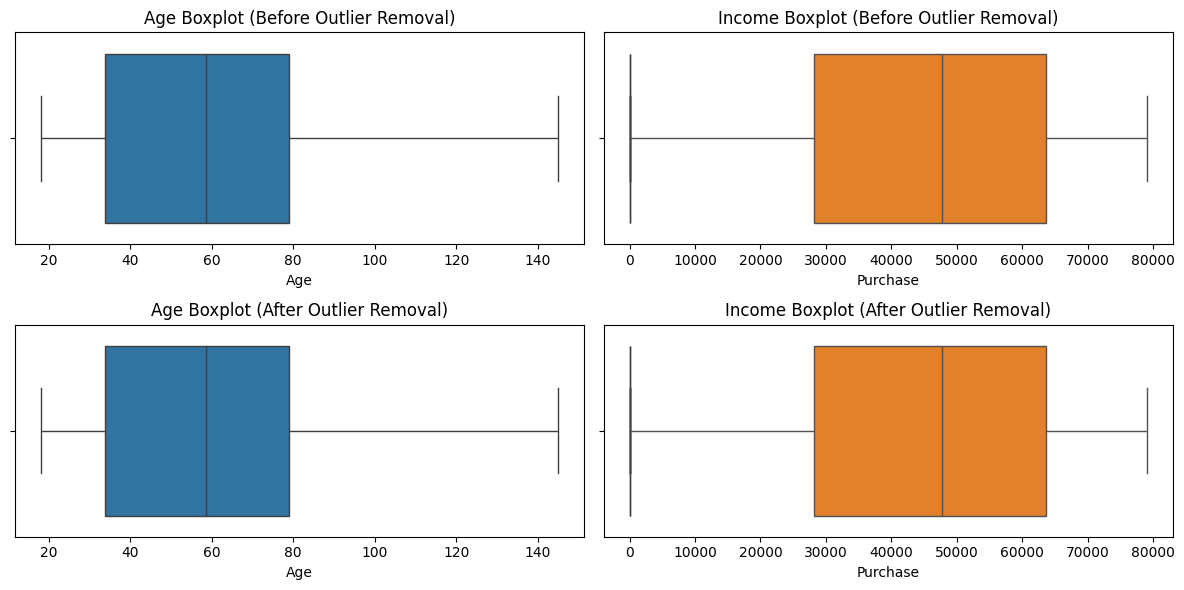

In [15]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Plot boxplots before outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Age', data=df)
plt.title('Age Boxplot (Before Outlier Removal)')

plt.subplot(2, 2, 2)
sns.boxplot(x='Purchase', data=df)
plt.title('Purchase Boxplot (Before Outlier Removal)')

plt.subplot(2, 2, 2)
sns.boxplot(x='Income', data=df)
plt.title('Income Boxplot (Before Outlier Removal)')

# Remove outliers using IQR
df_cleaned = remove_outliers_iqr(df, 'Age')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Income')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Purchase')
# Plot boxplots after outlier removal
plt.subplot(2, 2, 3)
sns.boxplot(x='Age', data=df_cleaned)
plt.title('Age Boxplot (After Outlier Removal)')

plt.subplot(2, 2, 4)
sns.boxplot(x='Purchase', data=df_cleaned)
plt.title('Purchase Boxplot (After Outlier Removal)')

plt.subplot(2, 2, 4)
sns.boxplot(x='Income', data=df_cleaned)
plt.title('Income Boxplot (After Outlier Removal)')

plt.tight_layout()
plt.show()

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


Logistic Regression without Scaling - Test Accuracy: 0.72


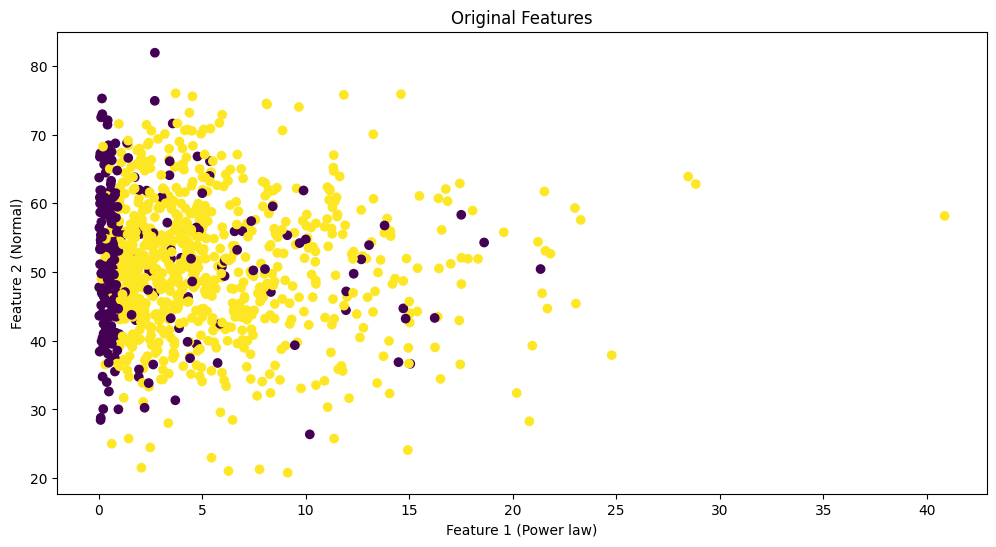

Logistic Regression with StandardScaler - Test Accuracy: 0.72


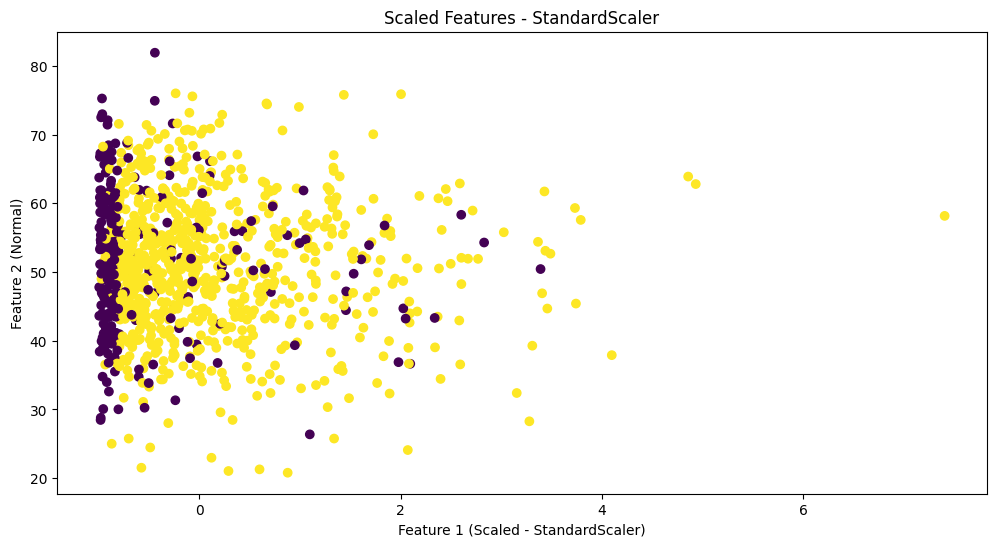

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]
# Combine features into a single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
accuracy_before_scaling = lr.score(X_test, y_test)
print(f"Logistic Regression without Scaling - Test Accuracy: {accuracy_before_scaling:.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.title('Original Features')
plt.show()
# Scale the exponential feature using StandardScaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[:, 0] = scaler.fit_transform(X[:, 0].reshape(-1, 1)).flatten()

# Split the scaled dataset
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression with StandardScaler
lr_scaled = LogisticRegression(max_iter=1000)
lr_scaled.fit(X_train_scaled, y_train)
accuracy_after_standard_scaling = lr_scaled.score(X_test_scaled, y_test)
print(f"Logistic Regression with StandardScaler - Test Accuracy: {accuracy_after_standard_scaling:.2f}")

# Plot scaled features
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Scaled - StandardScaler)')
plt.ylabel('Feature 2 (Normal)')
plt.title('Scaled Features - StandardScaler')
plt.show()

Logistic Regression without Scaling - Test Accuracy: 0.72


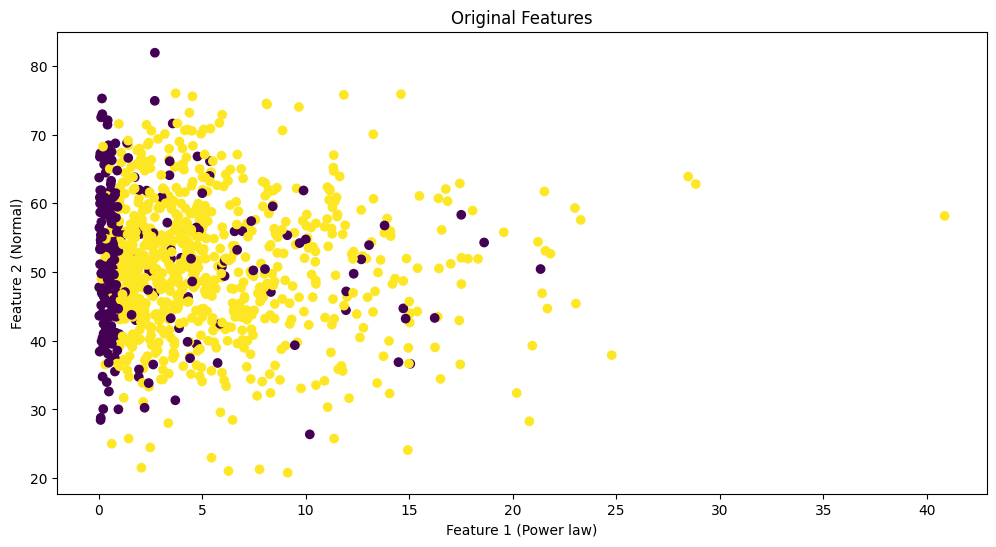

Logistic Regression with Log Transform - Test Accuracy: 0.92


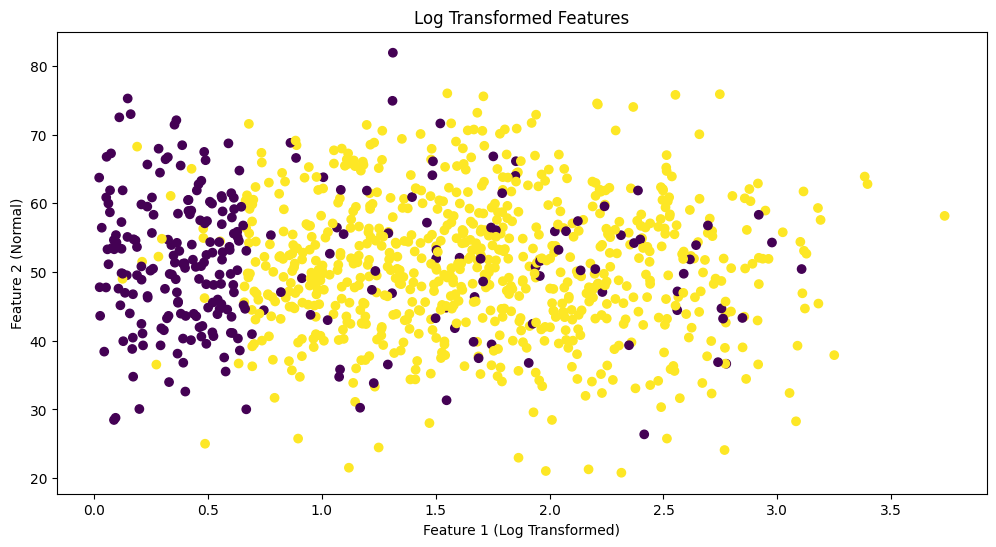

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)
# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]

# Combine features into a single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
accuracy_before_scaling = lr.score(X_test, y_test)
print(f"Logistic Regression without Scaling - Test Accuracy: {accuracy_before_scaling:.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.title('Original Features')
plt.show()

# Function to perform log transform on the exponential feature
log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)

# Apply log transform to the exponential feature
X_log_transformed = X.copy()
X_log_transformed[:, 0] = log_transformer.fit_transform(X[:, 0].reshape(-1, 1)).flatten()

# Split the transformed dataset
X_train_log_transformed, X_test_log_transformed, y_train, y_test = train_test_split(X_log_transformed, y, test_size=0.2, random_state=42)

# Logistic Regression with Log Transform
lr_log_transformed = LogisticRegression(max_iter=1000)
lr_log_transformed.fit(X_train_log_transformed, y_train)
accuracy_after_log_transform = lr_log_transformed.score(X_test_log_transformed, y_test)
print(f"Logistic Regression with Log Transform - Test Accuracy: {accuracy_after_log_transform:.2f}")

# Plot log-transformed features
plt.figure(figsize=(12, 6))
plt.scatter(X_log_transformed[:, 0], X_log_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Log Transformed)')
plt.ylabel('Feature 2 (Normal)')
plt.title('Log Transformed Features')
plt.show()


#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

In [21]:
df_titanic = pd.read_csv("../2-week2/data/titanic.csv")
df_titanic.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
titanic_data = pd.read_csv('../2-week2/data/titanic.csv')

# Select relevant columns for modeling
selected_columns = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'survived']
titanic_data = titanic_data[selected_columns]

# Convert 'sex' column to numeric (e.g., male=0, female=1)
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})

# Split the dataset into features (X) and target (y)
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a classifier
def train_and_evaluate(X_train, y_train, X_test, y_test):
    # Create a classifier (you can replace this with any classifier you want to test)
    classifier = DecisionTreeClassifier(random_state=42)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Evaluate and return accuracy
    return accuracy_score(y_test, y_pred)

# Method 1: Fill forward (ffill) in Pandas
X_fill_forward = X.fillna(method='ffill')
accuracy_fill_forward = train_and_evaluate(X_fill_forward, y, X_test.fillna(method='ffill'), y_test)
print(f"Accuracy with Fill Forward: {accuracy_fill_forward:.2f}")

# Method 2: Impute using median
imputer_median = SimpleImputer(strategy='median')
X_median_imputed = pd.DataFrame(imputer_median.fit_transform(X), columns=X.columns)
accuracy_median_imputed = train_and_evaluate(X_median_imputed, y, imputer_median.transform(X_test), y_test)
print(f"Accuracy with Median Imputation: {accuracy_median_imputed:.2f}")

# Method 3: Impute using most frequent
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
X_most_frequent_imputed = pd.DataFrame(imputer_most_frequent.fit_transform(X), columns=X.columns)
accuracy_most_frequent_imputed = train_and_evaluate(X_most_frequent_imputed, y, imputer_most_frequent.transform(X_test), y_test)
print(f"Accuracy with Most Frequent Imputation: {accuracy_most_frequent_imputed:.2f}")

# Method 4: Impute using KNN
imputer_knn = KNNImputer()
X_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(X), columns=X.columns)
accuracy_knn_imputed = train_and_evaluate(X_knn_imputed, y, imputer_knn.transform(X_test), y_test)
print(f"Accuracy with KNN Imputation: {accuracy_knn_imputed:.2f}")




   
    


Accuracy with Fill Forward: 0.83
Accuracy with Median Imputation: 0.84
Accuracy with Most Frequent Imputation: 0.85
Accuracy with KNN Imputation: 0.85


/tmp/ipykernel_5749/3360999378.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_fill_forward = X.fillna(method='ffill')
/tmp/ipykernel_5749/3360999378.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  accuracy_fill_forward = train_and_evaluate(X_fill_forward, y, X_test.fillna(method='ffill'), y_test)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid fea

#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [ ]:
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})

# Your code here

In [29]:
import pandas as pd

sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10, 2, 3, 1, 6, 9]
})

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(sample, columns=['color', 'target'])

# Display the result
print(one_hot_encoded)

   yumminess  color_blue  color_green  color_red  target_apple  target_grass  \
0         10       False        False       True          True         False   
1          2        True        False      False         False         False   
2          3       False         True      False         False          True   
3          1       False        False       True         False         False   
4          6        True        False      False         False         False   
5          9       False         True      False          True         False   

   target_moon  target_sky  
0        False       False  
1        False        True  
2        False       False  
3        False        True  
4         True       False  
5        False       False  


#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Compare your results with and without re-balancing your classes.
3. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

# Load the dataset
# Replace 'your_dataset.csv' with the actual path or URL to your dataset
df = pd.read_csv('data/synthetic_patient_data_unbalanced.csv')

# Identify categorical and numerical features
categorical_features = ['gender', 'exercise_frequency', 'smoker', 'family_history', 'diet_quality', 'us_state']
numerical_features = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_level']

# Preprocessing using ColumnTransformer and Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the classifier with class weights
classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])

# Split the data into features and target variable
X = df.drop('has_disease', axis=1)
y = df['has_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Without re-balancing classes
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Results without re-balancing classes:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print("Cross-validated Accuracy:", scores.mean())


Results without re-balancing classes:
              precision    recall  f1-score   support

           0       1.00      0.27      0.42        30
           1       0.93      1.00      0.96       300

    accuracy                           0.93       330
   macro avg       0.97      0.63      0.69       330
weighted avg       0.94      0.93      0.92       330

Accuracy: 0.9333333333333333
Cross-validated Accuracy: 0.9224242424242423
